### Project Milestone 5: Merging the Data and Storing in a Database/Visualizing Data
 
Author: Barbara Jean

Date: 06/03/2023

output: pdf_document

In [189]:
# Importing the necessary libraries
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

### 1- Load each dataset into SQL Lite as an individual table

**Flat File: SAIPE School District Estimates for 2021/ Estimates for Every School**

In [191]:
# Taking data from csv and  moving it to a Pandas Dataframe
df=pd.read_csv("C:/Users/79bar/dsc540/saipe.csv",encoding='latin1')
df.head()

,code_state,fips_code,district_id,district_name,est_tot_pop,est_pop_517,est_pov_householder
0,AL,1,190,Alabaster City School District,33897,6611,622
1,AL,1,5,Albertville City School District,22527,4668,1042
2,AL,1,30,Alexander City City School District,16964,2772,765
3,AL,1,60,Andalusia City School District,8840,1485,436
4,AL,1,90,Anniston City School District,21477,2977,1054


In [192]:
# Connecting to the SQLite Database using the connect() method
connection=sqlite3.connect("C:/Users/79bar/dsc540/us_school.db") 

In [193]:
cursor = connection.cursor() # Creating a cursor using the cursor() method on the connection, which will execute our SQL querie

In [194]:
# Creating a table in the SQLite database for the flat file data and insert the data
df.to_sql(name='saipe_table',
          con=connection,            # Using SQLAlchemy that permitting to use any DB supported by that library
          if_exists='replace',       # Dropping the table before inserting new values.
          dtype={'code_state':'text',  # Specifying the datatype for columns
                 'fips_code':'real',
                 'district_id':'integer',
                 'district_name':'text',
                 'est_tot_pop':'integer',
                 'est_pop_517':'integer',
                 'est_pov_householder':'integer'}
         )

13164

In [195]:
connection.commit() # Committing the changes

**Website: Student Race / Ethnicity Demographics By State And School Type, 2020-21**

In [196]:
# Scraping data from the website and storing the data in a DataFrame
df2=pd.read_csv("C:/Users/79bar/dsc540/student_race.csv")
df2.head()

,state,charter_total,charter_asian,charter_black,charter_hispanic,charter_white,charter_other,district_total,district_asian,district_black,district_hispanic,district_white,district_other
0,AK,8191.0,0.02,0.01,0.07,0.65,0.248,121681,0.056,0.025,0.073,0.458,0.387
1,AL,1984.0,0.01,0.78,0.02,0.17,0.017,730409,0.015,0.321,0.094,0.533,0.037
2,AR,42191.0,0.03,0.26,0.16,0.51,0.053,444114,0.016,0.192,0.135,0.607,0.050
3,AZ,230757.0,0.06,0.06,0.40,0.41,0.071,887554,0.023,0.052,0.477,0.347,0.100
4,CA,692783.0,0.07,0.07,0.52,0.27,0.070,5266224,0.125,0.049,0.559,0.210,0.057


In [197]:
# Creating a table in the SQLite database for the Website data and insert it
df2.to_sql(name='student_charter_table',
          con=connection,                   # Using SQLAlchemy that permitting to use any DB supported by that library
          if_exists='replace',              # Dropping the table before inserting new values
          dtype={'state':'text',            # Specifying the datatype for columns
                 'charter_total':'real',
                 'charter_asian':'real',
                 'charter_black':'real',
                 'charter_hispanic':'real',
                 'charter_white':'real',
                 'charter_other':'real',
                 'district_total':'real',
                 'district_asian':'real',
                 'district_balck':'real',
                 'district_hispanic':'real',
                 'district_white':'real',
                 'district_other':'real'})

52

In [198]:
connection.commit() # Committing the changes

**API:US Public Schools**

In [199]:
# Fetch data from the API or load the JSON file into a DataFrame
df3=pd.read_csv("C:/Users/79bar/dsc540/school1.csv")
df3.head()

,state,naics_code,naics_desc,population,enrollment,ft_teacher
0,AK,611110,elementary and secondary schools,141332,133691,7641
1,AL,611110,elementary and secondary schools,745121,693002,41130
2,AR,611110,elementary and secondary schools,468954,435176,33778
3,AZ,611110,elementary and secondary schools,768137,721306,42835
4,CA,611110,elementary and secondary schools,5021381,4782789,216614


In [200]:
# Creating a table in the SQLite database for the API/JSON data and insert the data
df3.to_sql(name='school_table',
          con=connection,              # Using SQLAlchemy that permitting to use any DB supported by that library
          if_exists='replace',         # Dropping the table before inserting new values
          dtype={'state':'text',       # Specifying the datatype for columns
                 'naics_code':'integer',
                 'naics_desc':'text',
                 'population':'integer',
                 'enrollment':'integer',
                 'ft_teacher':'real'})

54

In [201]:
connection.commit() # Committing the changes

### 2- Join the datasets together in Python into 1 dataset.

In [203]:
# Performing an SQL join query to combine the data from the tables
# INNER JOIND selects records that have matching values in both tables
query = '''
SELECT * FROM saipe_table
INNER JOIN student_charter_table 
ON saipe_table.code_state= student_charter_table.state
INNER JOIN school_table 
ON student_charter_table.state= school_table.state
'''
result = pd.read_sql_query(query, connection)# Returning a DataFrame corresponding to the result set of the query string
result.head()

,index,code_state,fips_code,district_id,district_name,est_tot_pop,est_pop_517,est_pov_householder,index,state,...,district_hispanic,district_white,district_other,index,state,naics_code,naics_desc,population,enrollment,ft_teacher
0,0,AL,1.0,190,Alabaster City School District,33897,6611,622,1,AL,...,0.094,0.533,0.037,1,AL,611110,elementary and secondary schools,745121,693002,41130.0
1,1,AL,1.0,5,Albertville City School District,22527,4668,1042,1,AL,...,0.094,0.533,0.037,1,AL,611110,elementary and secondary schools,745121,693002,41130.0
2,2,AL,1.0,30,Alexander City City School District,16964,2772,765,1,AL,...,0.094,0.533,0.037,1,AL,611110,elementary and secondary schools,745121,693002,41130.0
3,3,AL,1.0,60,Andalusia City School District,8840,1485,436,1,AL,...,0.094,0.533,0.037,1,AL,611110,elementary and secondary schools,745121,693002,41130.0
4,4,AL,1.0,90,Anniston City School District,21477,2977,1054,1,AL,...,0.094,0.533,0.037,1,AL,611110,elementary and secondary schools,745121,693002,41130.0


In [204]:
result.columns # Returning the column labels of the DataFrame

Index(['index', 'code_state', 'fips_code', 'district_id', 'district_name',
       'est_tot_pop', 'est_pop_517', 'est_pov_householder', 'index', 'state',
       'charter_total', 'charter_asian', 'charter_black', 'charter_hispanic',
       'charter_white', 'charter_other', 'district_total', 'district_asian',
       'district_black', 'district_hispanic', 'district_white',
       'district_other', 'index', 'state', 'naics_code', 'naics_desc',
       'population', 'enrollment', 'ft_teacher'],
      dtype='object')

### 3- Create 5 visualizations that demonstrate the data cleansed

**Visualizations that span across 2 of the tables "saipe_table" and "school_table"**

In [205]:
cursor.execute("SELECT est_pov_householder, ft_teacher FROM saipe_table, school_table WHERE saipe_table.code_state= school_table.state")
results2 = cursor.fetchall() # Returning a single record by using the cursor.fetchone() method


Text(0.5, 1.0, 'Poverty Estimates Vs Financial teacher Time ')

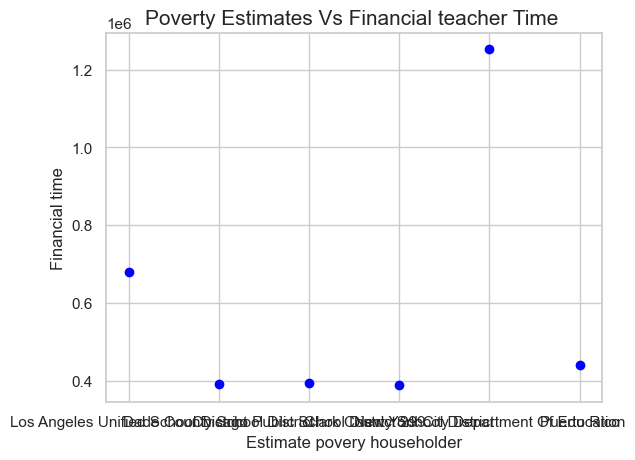

In [206]:
# Depicting scatted plot
plt.scatter(est_pov_householder, ft_teacher, c='blue')

# Setting label for x-axis
plt.xlabel( "Estimate povery householder" , size = 12 ) 
  
# Setting label for y-axis
plt.ylabel( "Financial time" , size = 12 ) 
  
# Seting title for figure
plt.title( "Poverty Estimates Vs Financial teacher Time " , size = 15 )

**Retrieve data from the saipe_table table and create two graphs**

In [207]:
# Selecting code_state,est_tot_pop from the table, and filtering the selection by using the "WHERE" statement
cursor.execute("SELECT code_state,est_tot_pop FROM saipe_table WHERE est_tot_pop > 2000000")
results = cursor.fetchall() # Returning a list of tuples record by using the cursor.fetchall() method

In [208]:
# Separating this data into 3 lists, to feed to matplotlib
code_state = [result[0] for result in results]
est_tot_pop= [result[1] for result in results]

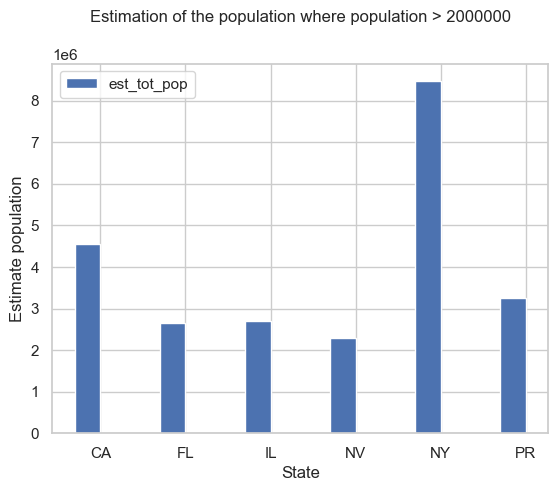

In [209]:
# Create a bar graph of the saipe_table data and a set of subplots within it
fig, ax = plt.subplots()
x = range(len(code_state)) # Finding out how many code_state are in our dataset
width = 0.3 # Defining the width of our bars in the bar graph
ax.bar([i - width/2 for i in x], est_tot_pop,
        width, label='est_tot_pop') 
ax.set_xticks(x)
ax.set_xticklabels(code_state)
ax.set_title('Estimation of the population where population > 2000000', pad=30) # Displaying a title
ax.set_xlabel('State') # # Setting label for x-axis
ax.set_ylabel('Estimate population') # Setting label for y-axis
ax.legend() 
plt.show()  # Displaying figure

In [210]:
# Finding the poverty Estimates number of children ages 5 to 17 by district name 
cursor.execute("SELECT district_name, est_pop_517 FROM saipe_table WHERE est_pop_517 >300000")
results = cursor.fetchall() # Returning a list of tuplesmrecord by using the cursor.fetchall() method
results 

[('Los Angeles Unified School District', 678821),
 ('Dade County School District', 391578),
 ('Chicago Public School District 299', 393249),
 ('Clark County School District', 387797),
 ('New York City Department Of Education', 1252210),
 ('Puerto Rico', 440908)]

In [211]:
district_name = [result[0] for result in results]
est_pop_517 = [result[1] for result in results]


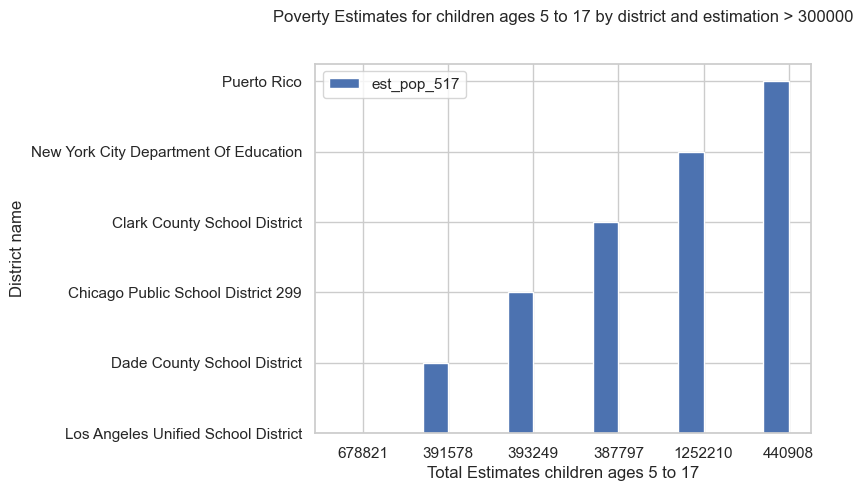

In [212]:
# Create a bar graph of the computescores data
fig, ax = plt.subplots()
x = range(len(est_pop_517))
width = 0.3
ax.bar([i - width/2 for i in x], district_name,
        width, label='est_pop_517')
ax.set_xticks(x)
ax.set_xticklabels(est_pop_517)
ax.set_title('Poverty Estimates for children ages 5 to 17 by district and estimation > 300000', pad=30)
ax.set_xlabel('Total Estimates children ages 5 to 17')
ax.set_ylabel('District name')
ax.legend()
plt.show()

**Retrieve data from the consolidated website dataset that I created and create two graphs**

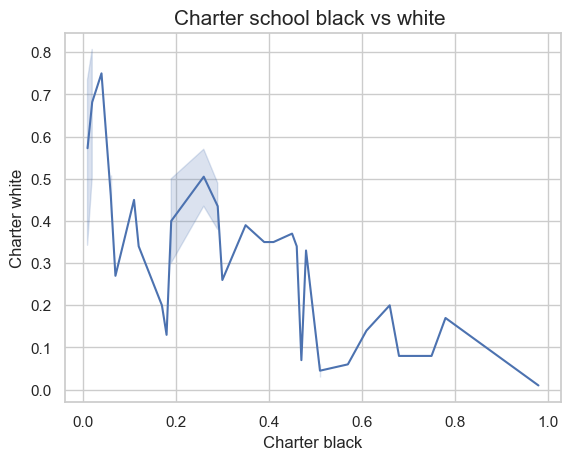

In [213]:
# Drawing a line plot with the possibility of several semantic groupings
sns.lineplot(x='charter_black', y='charter_white', data=df2)

# Setting label for x-axis
plt.xlabel( "Charter black" , size = 12 ) 
  
# Setting label for y-axis
plt.ylabel( "Charter white" , size = 12 ) 
  
# Seting title for figure
plt.title( "Charter school black vs white " , size = 15 )
  
# Displaying figure
plt.show() 

A histogram with a line can be displayed using Seaborn Distplot.

Text(0.5, 1.0, 'Total public charter school in USA')

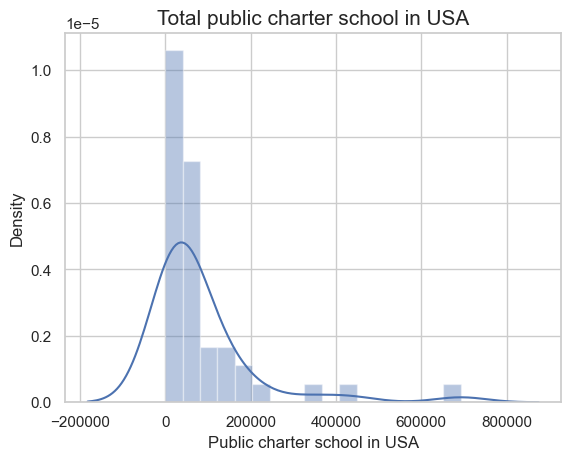

In [214]:
# Using distplot() function to combines the matplotlib hist function with the seaborn
sns.distplot(df2['charter_total']) 
plt.xlabel( "Public charter school in USA" , size = 12 )
  
# Setting title for figure
plt.title( "Total public charter school in USA" , size = 15 )


**Retrieve data from the consolidated API dataset that I created and create two graphs** 

A box plot illustrates the distribution of numerical data in a way that makes it easy to compare different variables or levels of a categorical variable.

Text(0.5, 1.0, 'Financial times of teachers in USA')

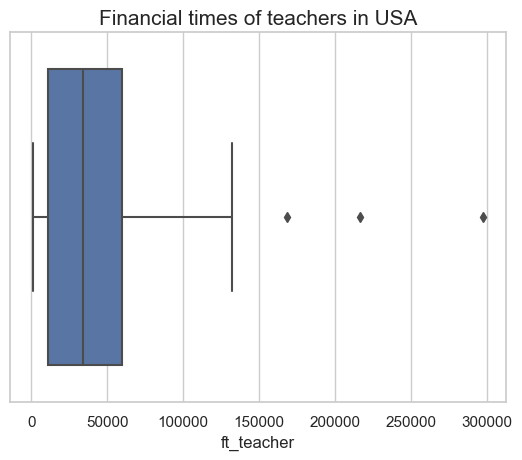

In [215]:
# Using whitegrid to set style of background of plot
sns.set(style="whitegrid")
sns.boxplot(x =df3['ft_teacher'])# Drawing a single horizontal boxplot for population variable 
plt.title( "Financial times of teachers in USA" , size = 15 )

Text(0.5, 1.0, 'Total public charter school in USA')

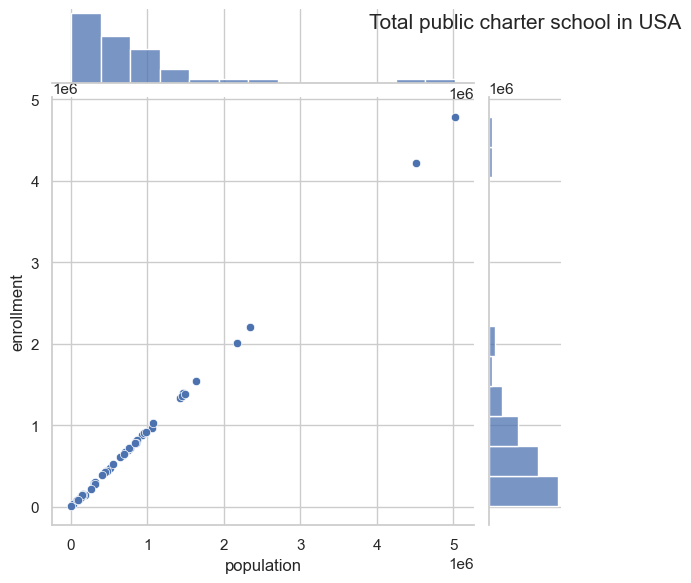

In [216]:
# plotting scatterplot with histograms for features population and enrollment.
sns.jointplot(data=df3, x="population", y="enrollment")
# Setting title
plt.title( "Total public charter school in USA" , pad=50, size = 15 )

In [217]:
connection.close() # closing the database connection

 #### Summary of what I learned and had to do to complete the project and the ethical implications of data wrangling

Data wrangling, also known as data cleaning, refers to a set of procedures that aim to transform raw data into more usable formats. Studies show that data scientists spend approximately 80% of their time on data preparation, which includes gathering, cleaning, and storing data. In order to complete my project, I had to choose three different data sources with varying file types, including a flat file (CSV), scrapped data from a website, and API data, all of which needed to be related to one another. However, it is important to note that using data retrieved poses ethical issues, such as consent, confidentiality, anonymity, trust, and transparency. The three different data sources I used for this project were licensed under the public domain, allowing anyone to legally use or reference the dataset without permission.

The flat file data was collected by the Census Bureau, which recorded the Small Area Income and Poverty Estimates (SAIPE) program in the US. The web scraping data was collected by the National Alliance, and the API was obtained through Opendatasoft Explore API v2, which was collected by the Common Core of Data (CCD), National Center for Education Statistics (NCES), and the US Department of Education for the 2017-18 school year.

Cleaning the data was the next important step once the data was collected. Common packages for data preparation, such as NumPy and Pandas, Scipy, Matplotlib, etc., were introduced. Cleaning the data involved several steps, such as converting strings to lower or proper case, removing irrelevant information, identifying and addressing missing data, dealing with inconsistent values, finding outliers, and identifying duplicates. It is important to note that some transformations were made, such as filling in missing data and removing outliers, dropping columns solely for the purpose of practicing the concepts learned in this course.

Other methods I learned in data wrangling include grouping, merging, joining, and concatenating two datasets. Finally, an important part of a data science project is storing and querying data in a database that is ready for reuse for analysis, such as visualization. As part of my project, the dataset was stored in an SQLite database. This term, I gained a lot of knowledge about the data wrangling process and its significance in data science projects.
